In [2]:
import re

def process_line(stdout):
    energy = []
    sign = []
    time = []
    dimer = []

    for line in str(stdout).split("\\n"):

        pat = "Total Energy"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.split("+-")
            energy = [float(line[0]), float(line[1])]


        pat = "average sign"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.split("+-")
            sign = [float(line[0]), float(line[1])]

        pat = "Elapsed time"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.replace("sec","")
            time = [float(line)]
            
        pat = "dimer operator"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            dimer = [float(line)]
            
    return energy, sign, dimer, time

## calculate exact value

In [3]:
from hams import *

/home/keisuke/worms/python/nsp/hams.py:27: ComplexWarning: Casting complex values to real discards the imaginary part
  SySy = np.kron(Sy,Sy).astype(np.float64)
/home/keisuke/miniconda3/envs/quspin/lib/python3.7/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [7]:
import os
import numpy as np
os.chdir("../../build")
T =  np.logspace(-1, -0.3, num=10)

# original Majumdar-Ghosh model

## sampling energies for several temperature 

### L = 6

In [5]:
def exp_energy(E, beta):
    Z = np.exp(-beta*E)
    EZ = E*Z
    return np.sum(EZ)/np.sum(Z)
E_exact = np.array([exp_energy(E_MG,1/t) for t in T])

In [58]:
import subprocess
path = ["-PATH1", "../python/array/MG_union_bond.npy"]
worm = ["-fw" , "1", "-zw", "1", "-pom", "1"]
energy_array = []
sign_array = []
time_array = []
for t in T:
    out = subprocess.Popen(["./MG", "-L", "6", "-T", "{:.2f}".format(t), "-m", "100000", "-n", "10000000", "-M", "MG_2", "-shift", "0.25"]+worm+path, 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time = process_line(stdout)
    print(f"T = {t}",energy)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)

T = 0.1 [2.83003, 24.1304]
T = 0.11961283330787534 [-2.85697, 2.69864]
T = 0.14307229891937576 [-9.35595, 19.0432]
T = 0.1711328304161781 [-2.22275, 0.4127]
T = 0.2046968271807521 [-2.18182, 0.153071]
T = 0.24484367468222268 [-2.05851, 0.0570726]
T = 0.2928644564625237 [-1.96055, 0.0237143]
T = 0.3503034741265337 [-1.91553, 0.0109687]
T = 0.41900791057866693 [-1.79957, 0.0059288]
T = 0.5011872336272722 [-1.68805, 0.00361093]


In [147]:
path = ["-PATH1", "../python/array/MG_union_rns_bond.npy"]
worm = ["-fw" , "1", "-zw", "1", "-pom", "1"]

import subprocess
energy_array2 = []
sign_array2 = []
time_array2 = []
for t in T:
    out = subprocess.Popen(["./MG", "-L", "6", "-T", "{:.2f}".format(t), "-m", "100000", "-n", "10000000", "-M", "MG_2", "-shift", "0.25"]+worm+path, 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time = process_line(stdout)
    print(f"T = {t}",energy)
    energy_array2.append(energy)
    sign_array2.append(sign)
    time_array2.append(time)

T = 0.1 [-2.24067, 0.0163499]
T = 0.11961283330787534 [-2.2316, 0.0101673]
T = 0.14307229891937576 [-2.21716, 0.0072101]
T = 0.1711328304161781 [-2.17541, 0.00486107]
T = 0.2046968271807521 [-2.13334, 0.0035895]
T = 0.24484367468222268 [-2.06906, 0.00259671]
T = 0.2928644564625237 [-1.99071, 0.00191446]
T = 0.3503034741265337 [-1.89946, 0.00146143]
T = 0.41900791057866693 [-1.79939, 0.0011592]
T = 0.5011872336272722 [-1.6884, 0.000965074]


In [142]:
path = ["-PATH1", "../python/array/MG_union_rns2_bond.npy"]
worm = ["-fw" , "1", "-zw", "1", "-pom", "1"]

import subprocess
energy_array3 = []
sign_array3 = []
time_array3 = []
for t in T:
    out = subprocess.Popen(["./MG", "-L", "6", "-T", "{:.2f}".format(t), "-m", "100000", "-n", "10000000", "-M", "MG_2", "-shift", "0.25"]+worm+path, 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time = process_line(stdout)
    print(f"T = {t}",energy)
    energy_array3.append(energy)
    sign_array3.append(sign)
    time_array3.append(time)

T = 0.1 [-2.06406, 3.80021]
T = 0.11961283330787534 [-4.64325, 18.1207]
T = 0.14307229891937576 [-2.14596, 0.482579]
T = 0.1711328304161781 [-2.15335, 0.17381]
T = 0.2046968271807521 [-2.18066, 0.0723673]
T = 0.24484367468222268 [-2.09403, 0.0304502]
T = 0.2928644564625237 [-1.99273, 0.0139989]
T = 0.3503034741265337 [-1.90103, 0.00737953]
T = 0.41900791057866693 [-1.80013, 0.00430848]
T = 0.5011872336272722 [-1.69416, 0.00281219]


In [149]:
sign_array = np.array(sign_array)
sign_array2 = np.array(sign_array2)
sign_array3 = np.array(sign_array3)
energy_array = np.array(energy_array)
energy_array2 = np.array(energy_array2)
energy_array3 = np.array(energy_array3)


In [146]:
# import pickle
# f = open('tmp.txt', 'wb')
# list_row = [T, sign_array, energy_array, sign_array2, energy_array2]
# pickle.dump(list_row, f)
# f = open("tmp.txt","rb")
# list_row = pickle.load(f)

# L = 6, scheme 1 (special case)

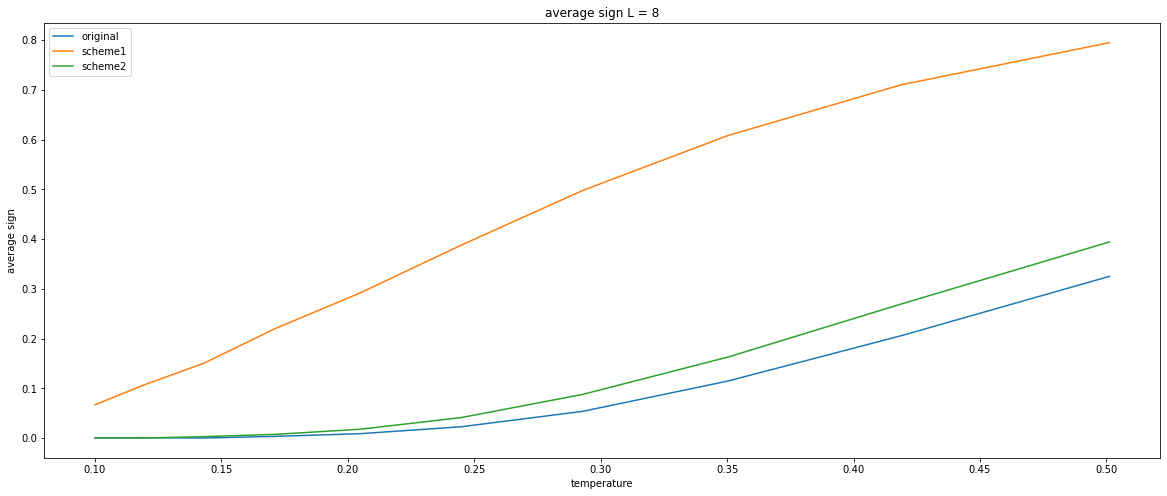

In [150]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(T, sign_array[:,0], label = "original")
ax.plot(T, sign_array2[:,0], label = "scheme1")
ax.plot(T, sign_array3[:,0], label = "scheme2")

ax.set_title(f'average sign L = 8')
ax.set_xlabel('temperature')
ax.set_ylabel('average sign')
ax.legend()
fig.show()

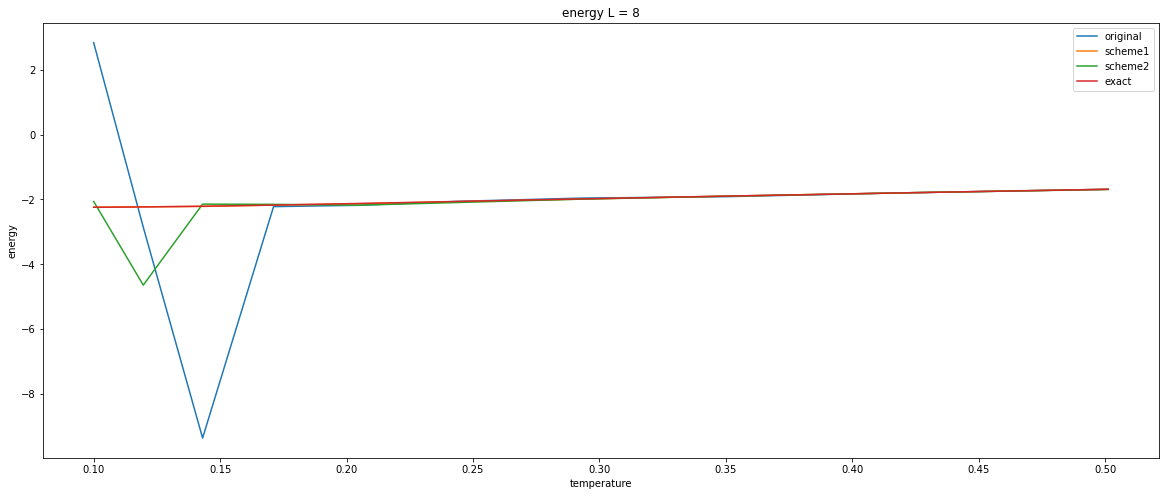

In [151]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(T, energy_array[:,0], label = "original")
ax.plot(T, energy_array2[:,0], label = "scheme1")
ax.plot(T, energy_array3[:,0], label = "scheme2")

ax.plot(T, E_exact[:], label = "exact")

ax.set_title(f'energy L = 8')
ax.set_xlabel('temperature')
ax.set_ylabel('energy')
ax.legend()
fig.show()

### L = 12



In [10]:
import subprocess
path = ["-PATH1", "../python/array/MG_union_bond.npy"]
worm = ["-fw" , "1", "-zw", "1", "-pom", "1"]
energy_array_12 = []
sign_array_12 = []
time_array_12 = []
for t in T:
    out = subprocess.Popen(["./MG", "-L", "12", "-T", "{:.2f}".format(t), "-m", "100000", "-n", "2000000", "-M", "MG_2", "-shift", "0.25"]+worm+path, 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time = process_line(stdout)
    print(f"T = {t}",energy)
    energy_array_12.append(energy)
    sign_array_12.append(sign)
    time_array_12.append(time)

T = 0.1 [-7.13024, 15.0374]
T = 0.11961283330787534 [-6.78191, 6.82421]
T = 0.14307229891937576 [-6.10419, 22.5758]
T = 0.1711328304161781 [-6.43155, 6.55127]
T = 0.2046968271807521 [-6.34608, 6.70384]
T = 0.24484367468222268 [-9.76023, 9.49597]
T = 0.2928644564625237 [-3.74869, 0.727581]
T = 0.3503034741265337 [-3.59482, 0.216438]
T = 0.41900791057866693 [-3.55309, 0.0731322]
T = 0.5011872336272722 [-3.29993, 0.0314568]


In [15]:
import subprocess
path = ["-PATH1", "../python/array/MG_union_rns2_bond.npy"]
worm = ["-fw" , "1", "-zw", "1", "-pom", "1"]
energy_array_2_12 = []
sign_array_2_12 = []
time_array_2_12 = []
for t in T:
    out = subprocess.Popen(["./MG", "-L", "12", "-T", "{:.2f}".format(t), "-m", "100000", "-n", "2000000", "-M", "MG_2", "-shift", "0"]+worm+path, 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time = process_line(stdout)
    print(f"T = {t}",energy)
    energy_array_2_12.append(energy)
    sign_array_2_12.append(sign)
    time_array_2_12.append(time)

T = 0.1 [-5.62843, 9.0482]
T = 0.11961283330787534 [-6.6268, 7.63359]
T = 0.14307229891937576 [-7.00973, 11.2619]
T = 0.1711328304161781 [-4.74861, 2.36157]
T = 0.2046968271807521 [-6.06738, 5.18516]
T = 0.24484367468222268 [-4.40993, 0.734929]
T = 0.2928644564625237 [-3.80766, 0.245484]
T = 0.3503034741265337 [-3.68589, 0.0794423]
T = 0.41900791057866693 [-3.52396, 0.0336036]
T = 0.5011872336272722 [-3.3113, 0.0167905]


In [16]:
sign_array_12 = np.array(sign_array_12)
sign_array_2_12 = np.array(sign_array_2_12)
energy_array_12 = np.array(energy_array_12)
energy_array_2_12 = np.array(energy_array_2_12)


In [17]:
sign_array_12

array([[-0.000453  ,  0.00070711],
       [-0.000972  ,  0.00070711],
       [ 0.000279  ,  0.00070711],
       [-0.000986  ,  0.00070711],
       [ 0.000957  ,  0.00070711],
       [-0.000872  ,  0.00070711],
       [ 0.007225  ,  0.00070709],
       [ 0.023737  ,  0.00070691],
       [ 0.068434  ,  0.00070545],
       [ 0.150835  ,  0.00069902]])

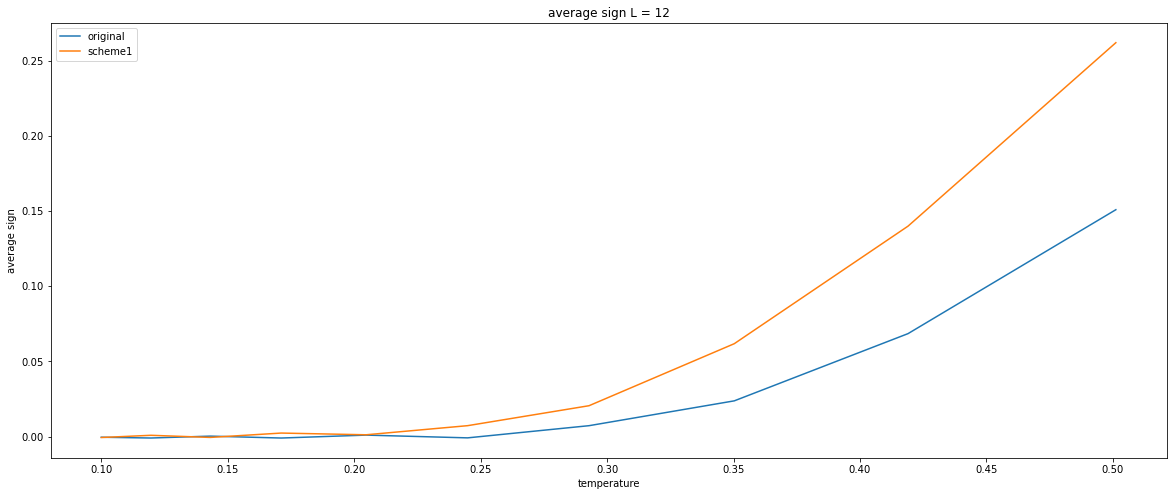

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(T, sign_array_12[:,0], label = "original")
ax.plot(T, sign_array_2_12[:,0], label = "scheme1")

ax.set_title(f'average sign L = 12')
ax.set_xlabel('temperature')
ax.set_ylabel('average sign')
ax.legend()
# fig.show()
fig.savefig("../doc/img/MG_sign_L12.png")

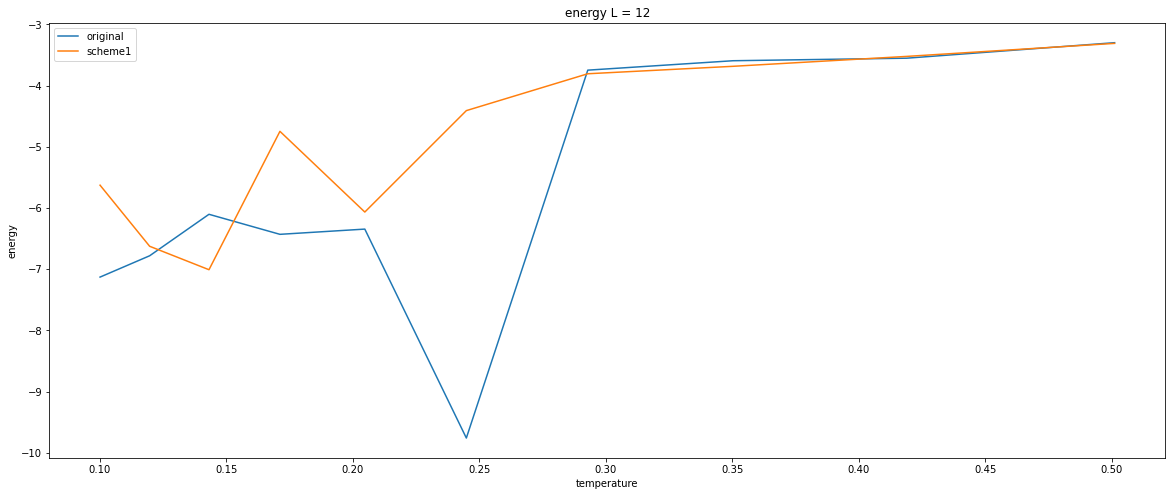

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(T, energy_array_12[:,0], label = "original")
ax.plot(T, energy_array_2_12[:,0], label = "scheme1")


ax.set_title(f'energy L = 12')
ax.set_xlabel('temperature')
ax.set_ylabel('energy')
ax.legend()
fig.savefig("../doc/img/MG_energy_L12.png")

### L = 18



In [27]:
import subprocess
path = ["-PATH1", "../python/array/MG_union_bond.npy"]
worm = ["-fw" , "1", "-zw", "1", "-pom", "1"]
energy_array_12 = []
sign_array_12 = []
time_array_12 = []
for t in T:
    out = subprocess.Popen(["./MG", "-L", "18", "-T", "{:.2f}".format(t), "-m", "100000", "-n", "1000000", "-M", "MG_2", "-shift", "0.25"]+worm+path, 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time = process_line(stdout)
    print(f"T = {t}",energy)
    energy_array_12.append(energy)
    sign_array_12.append(sign)
    time_array_12.append(time)

T = 0.1 [-10.5689, 13.1155]
T = 0.11961283330787534 [-7.60712, 14.9161]
T = 0.14307229891937576 [-10.8398, 12.4079]
T = 0.1711328304161781 [-9.77373, 11.104]
T = 0.2046968271807521 [-10.8335, 5.85687]
T = 0.24484367468222268 [-3.68201, 17.3682]
T = 0.2928644564625237 [-8.26919, 3.00431]
T = 0.3503034741265337 [-6.63511, 2.33449]
T = 0.41900791057866693 [-5.15509, 0.511456]
T = 0.5011872336272722 [-4.89099, 0.165893]


In [28]:
import subprocess
path = ["-PATH1", "../python/array/MG_union_rns2_bond.npy"]
worm = ["-fw" , "1", "-zw", "1", "-pom", "1"]
energy_array_2_12 = []
sign_array_2_12 = []
time_array_2_12 = []
for t in T:
    out = subprocess.Popen(["./MG", "-L", "18", "-T", "{:.2f}".format(t), "-m", "100000", "-n", "1000000", "-M", "MG_2", "-shift", "0"]+worm+path, 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time = process_line(stdout)
    print(f"T = {t}",energy)
    energy_array_2_12.append(energy)
    sign_array_2_12.append(sign)
    time_array_2_12.append(time)

T = 0.1 [-8.57304, 5.292]
T = 0.11961283330787534 [-7.39095, 8.69263]
T = 0.14307229891937576 [-11.0393, 20.6102]
T = 0.1711328304161781 [-7.27392, 36.6676]
T = 0.2046968271807521 [-1.93654, 12.6347]
T = 0.24484367468222268 [-10.35, 52.5535]
T = 0.2928644564625237 [-6.14557, 2.17611]
T = 0.3503034741265337 [-5.6284, 0.572936]
T = 0.41900791057866693 [-5.24486, 0.157389]
T = 0.5011872336272722 [-4.99807, 0.0630074]


In [29]:
sign_array_12 = np.array(sign_array_12)
sign_array_2_12 = np.array(sign_array_2_12)
energy_array_12 = np.array(energy_array_12)
energy_array_2_12 = np.array(energy_array_2_12)


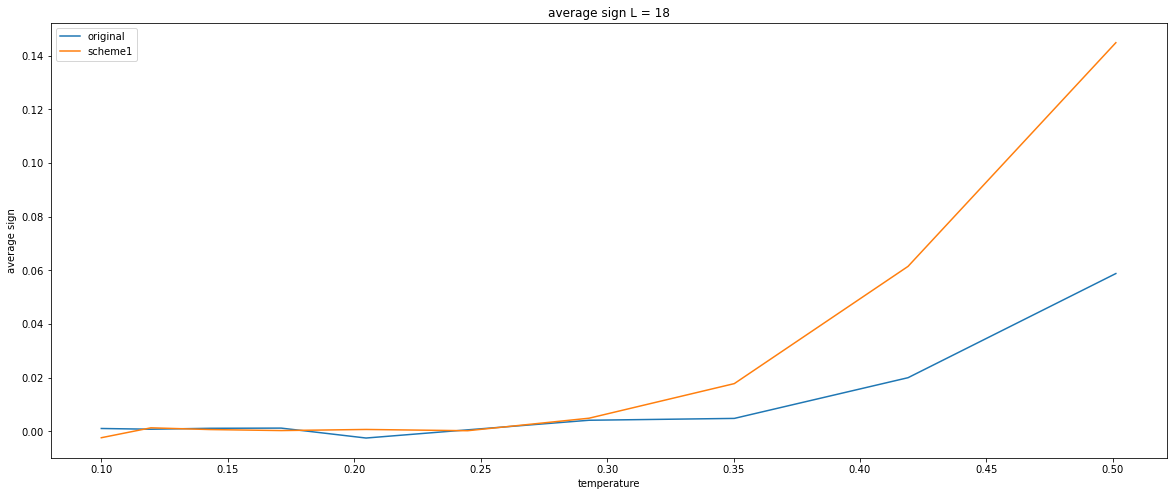

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(T, sign_array_12[:,0], label = "original")
ax.plot(T, sign_array_2_12[:,0], label = "scheme1")

ax.set_title(f'average sign L = 18')
ax.set_xlabel('temperature')
ax.set_ylabel('average sign')
ax.legend()
# fig.show()
fig.savefig("../doc/img/MG_sign_L18.png")

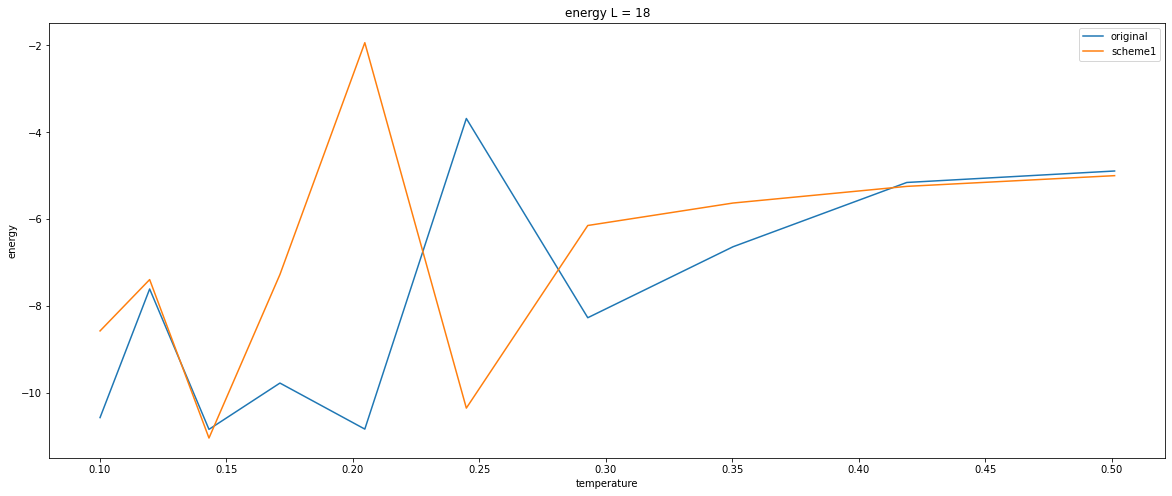

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(T, energy_array_12[:,0], label = "original")
ax.plot(T, energy_array_2_12[:,0], label = "scheme1")


ax.set_title(f'energy L = 18')
ax.set_xlabel('temperature')
ax.set_ylabel('energy')
ax.legend()
fig.savefig("../doc/img/MG_energy_L18.png")